In [131]:
using LinearAlgebra
using Arpack
using Plots

In [53]:
n = 5
iter = 20
x = rand(n, 1)

5×1 Matrix{Float64}:
 0.29177993628195975
 0.7426923112463464
 0.36782037889313957
 0.3952808827747971
 0.22908870480784693

In [54]:
A =[
    0.2615    0.3692    0.0154    0.1231    0.2308;
    0.3538    0.0769    0.1077    0.2154    0.2462;
    0.0615    0.0923    0.2000    0.3077    0.3385;
    0.1538    0.1846    0.2923    0.3231    0.0462;
    0.1692    0.2769    0.3846    0.0308    0.1385
]

5×5 Matrix{Float64}:
 0.2615  0.3692  0.0154  0.1231  0.2308
 0.3538  0.0769  0.1077  0.2154  0.2462
 0.0615  0.0923  0.2     0.3077  0.3385
 0.1538  0.1846  0.2923  0.3231  0.0462
 0.1692  0.2769  0.3846  0.0308  0.1385

In [55]:
for i in 1:iter
    x = A*x
end

In [56]:
x

5×1 Matrix{Float64}:
 0.4053226684117196
 0.40532266842211867
 0.40532266842226417
 0.4053226683732162
 0.4053226683555219

In [57]:
A*x

5×1 Matrix{Float64}:
 0.40532266839801107
 0.4053226683915254
 0.4053226683839179
 0.4053226684016846
 0.4053226684096852

In [58]:
a, b = eigs(A)
a

┌ Warning: Adjusting nev from 6 to 3
└ @ Arpack /home/leila/.julia/packages/Arpack/pLziT/src/Arpack.jl:92


3-element Vector{ComplexF64}:
  0.9999999999999993 + 0.0im
 -0.3273215924627377 + 0.0im
 0.32732159246273757 + 0.0im

In [59]:
b

5×3 Matrix{ComplexF64}:
 0.447214+0.0im  0.0976218+0.0im    0.678073+0.0im
 0.447214+0.0im   0.352626+0.0im    0.322336+0.0im
 0.447214+0.0im   0.550129+0.0im   -0.550029+0.0im
 0.447214+0.0im  -0.322236+0.0im   -0.352526+0.0im
 0.447214+0.0im  -0.677973+0.0im  -0.0975221+0.0im

In [60]:
X = rand(n, 1)
B = rand(Float64, (n, n));

In [61]:
for i in 1:iter
    x = B*X
end

In [62]:
X

5×1 Matrix{Float64}:
 0.9090200628517697
 0.9814448004710259
 0.4261439891124781
 0.8115040039019115
 0.2735064652240835

In [63]:
B*X

5×1 Matrix{Float64}:
 1.6123022122873993
 1.1050024006547674
 1.4636716509333547
 1.8387730909444315
 1.7719688663796027

In [108]:
function poweriter(A, numiter)
"""
Power iteration for the dominant eigenvalue.

Input:
    A           square matrix
    numiter     #iteration
Output:
    γ           vector of the dominant eigenvalue approximations
    x           final eigenvector approximation
"""
    n = size(A, 1)
    x = normalize(randn(n), Inf)
    γ = zeros(numiter)
    for k in 1:numiter
        y = A*x
        m = argmax(abs.(y))
        γ[k] = y[m] / x[m]
        x = y / y[m]
    end
    return γ, x
end

poweriter (generic function with 1 method)

In [109]:
γ, v = poweriter(B, 10);
c, ~ = eigs(B)
c[1] , γ[end]

┌ Warning: Adjusting nev from 6 to 3
└ @ Arpack /home/leila/.julia/packages/Arpack/pLziT/src/Arpack.jl:92


(2.1528672879439603 + 0.0im, 2.15168191970174)

In [125]:
# Convergence
λ = [1, -.75, .6, -.4, 0]
A = UpperTriangular(ones(5,5)) + diagm(λ .- 1)

5×5 Matrix{Float64}:
 1.0   1.0   1.0   1.0  1.0
 0.0  -0.75  1.0   1.0  1.0
 0.0   0.0   0.6   1.0  1.0
 0.0   0.0   0.0  -0.4  1.0
 0.0   0.0   0.0   0.0  0.0

In [146]:
iter = 40
γ, x = poweriter(A, iter);
λ1 = gamma[end]

1.0006262122610756

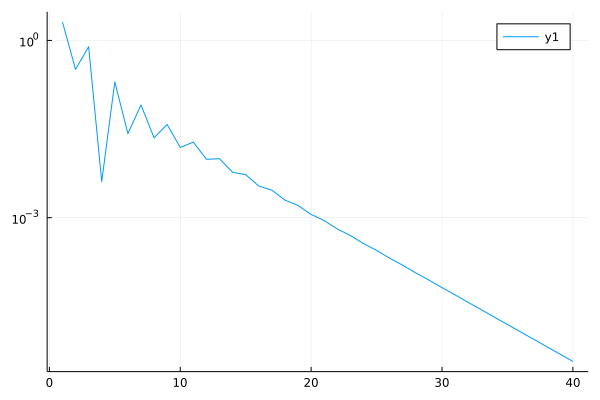

In [148]:
err = 1 .- γ # λ1 .- γ;
plot(1:iter, abs.(err), yaxis=:log)

In [149]:
# This is how power iteration should converge asymptotically
λ[2] / λ[1] , err[40] / err[39]

(-0.75, -0.7494639146132678)